In [1]:
import tsp_general_functions
from tsp_classes import City
from typing import List, Tuple
import numpy as np
import random
import time

In [2]:
from tsp_classes import City
from typing import List, Tuple
import numpy as np
import random
import time
import tsp_general_functions


def grasp_nearest_neighbour(cities: List[City], iterations=20, fraction_of_best=1.2):
    """
    Extend the nearest neighbour heuristic with GRASP. Select one city no further than fraction_of_best * d_closest city
    :param cities: all cities to be visited
    :param iterations: The number of GRASP iterations
    :param fraction_of_best: The fraction for which cities are accepted
    :return: The path, the objective, the computation time
    """
    t0 = time.time()
    best_path = None
    best_objective = np.inf
    for _ in range(iterations):
        # Repeat for all iterations
        path = [cities[0]]
        total_distance = 0
        unvisited_cities = set(cities[1:])
        while len(unvisited_cities) > 0:
            # Continue until all cities are visited
            # Find the extra distance to each unvisited city and the distance to the closest city
            extra_distances, best_extra_distance = path[-1].closest_other_city_dict(unvisited_cities)
            # Consider all cities that are within fraction_of_best * best_extra_distance distance
            options = [city for city, extra_distance in extra_distances.items()
                       if extra_distance <= fraction_of_best * best_extra_distance]
            # Select one of these cities randomly
            chosen_city = options[random.randint(0, len(options) - 1)]
            # Add this city to the path and do the bookkeeping
            path.append(chosen_city)
            total_distance += extra_distances[chosen_city]
            unvisited_cities.remove(chosen_city)

        # Calculate the path length by connecting the last and first city
        total_distance += path[-1].distance_to(path[0])
        if total_distance < best_objective:
            # If the obtained path is the best one so far remember it
            best_objective = total_distance
            best_path = path

    t_total = time.time() - t0

    return best_path, best_objective, t_total


def local_search(cities: List[City], grasp_iterations=20, fraction_of_best=1.2):
    """
    Apply local search to improve the solution obtained with GRASP
    :param cities: all cities to be visited
    :param grasp_iterations: The number of GRASP iterations
    :param fraction_of_best: The fraction for which cities are accepted
    :return: The path, the objective, the computation time
    """
    t0 = time.time()
    path, length, time_initial = grasp_nearest_neighbour(cities, grasp_iterations, fraction_of_best)

    # vvvvvvv YOUR CODE HERE vvvvvvv
    # Hint: You might want to use the function tsp_general_functions.re_insert_path_segment(...)
    for _ in range(50):
        best_length = length
        best_path = path.copy()
        # You could also shorten the for loops
        for i in range(len(path)):
        # i = 0
            for j in range(i+1, len(path)):
            # j = i + 1 (The larger j the longer the path segment that you place at another position)
                for insert_left_index in range(len(path) - (j - i + 1)):
                # insert_left_index = 0 (If j=0 we place the segment in front)
                    for reverse in [True, False]:
                    # reverse = False
                        new_path, new_length = tsp_general_functions.re_insert_path_segment(
                            (i, j), insert_left_index, reverse, path, length)
                        if new_length < best_length - 0.0001:
                            best_length = new_length
                            best_path = new_path
        path = best_path
        length = best_length

    total_distance = length
    # ^^^^^^ YOUR CODE HERE ^^^^^^^

    t_total = time.time() - t0
    return path, total_distance, t_total



Solution is valid
Your solution has an objective value of 302.7546403604324 and was found in 0.39894938468933105 seconds


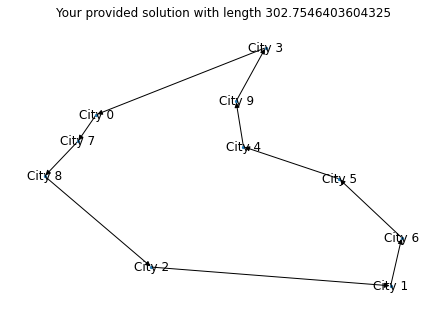

In [3]:
NUM_CITIES = 10
cities, G = tsp_general_functions.start_up(NUM_CITIES)

# If you need to, you could make changes here, do not update the output variable names
path, length, time_taken = local_search(cities, grasp_iterations=20, fraction_of_best=1.2)

# vvvvvv DON'T TOUCH THESE LINES IF YOU WANT TO FOLLOW THE ASSIGNMENT vvvvvvvv
tsp_general_functions.evaluate_path(path, cities, length)
print(f'Your solution has an objective value of {length} and was found in {time_taken} seconds')
tsp_general_functions.draw_path(G, path)
# ^^^^^^ DON'T TOUCH THESE LINES IF YOU WANT TO FOLLOW THE ASSIGNMENT ^^^^^^^^